<a href="https://colab.research.google.com/github/MilyaMakarenko/Dashboard_retail/blob/main/CV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [4]:
class LogicalAnd:
    def __init__(self):
        pass  # Конструктор может быть пустым, если нет дополнительных атрибутов

    def evaluate(self, x1, x2):
        print('logical_and', x1, x2)
        if x1 is True and x2 is True:
            print(True, True)
            return 1
        else:
            return 0



class LogicalOr:
    def __init__(self):
        pass  # Конструктор может быть пустым, если нет дополнительных атрибутов

    def evaluate(self, x1, x2):
        print('logical_or', x1, x2)
        if x1==True or x2==True:
            print(True, True)
            return 1
        else:
            return 0

def logical_and(x1,x2):
    print('logical_and', x1,x2)
    if x1==True and x2==True:
        print(True, True)
        return 1
    else:
        return 0


def logical_or(x1,x2):
    print('logical_or', x1,x2)
    if x1==True or x2==True:
        print(True, True)
        return 1
    else:
        return 0

def logical_xor(x1,x2):
    print('logical_xor', x1,x2)
    if x1==x2:
        print(x1, x2)
        return 1
    else:
        return 0

def def_not(x):
    print('def_not', 1-x)
    return 1-x

In [2]:
def diff_sigmoi(x):
    result = 1 / (1 + np.exp(-x))

    return result*(1-result)

diff_sigmoi(2)

np.float64(0.10499358540350662)

In [3]:
import torch
torch.cuda.is_available()
#device = torch.device("cuda:0")

True

In [5]:
# сравнение
import time
size=(10000,10000)
# Время для торch.empty
start_time=time.time()
tensor_empty=torch.empty(size)
end_time=time.time()
print(f'start - end = {end_time-start_time}')
# Время для torch.zeros
start_time=time.time()
tensor_zeros=torch.zeros(size)
end_time=time.time()
print(f'start - end = {end_time-start_time}')

start - end = 0.00030994415283203125
start - end = 0.9159696102142334


In [6]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [7]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=1
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 11.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.07MB/s]


In [12]:
if torch.cuda.is_available():
    device= torch.device('cuda')
else:
    device= torch.device('cpu')
model.to(device) # нам не нужно, т к все на CPU

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

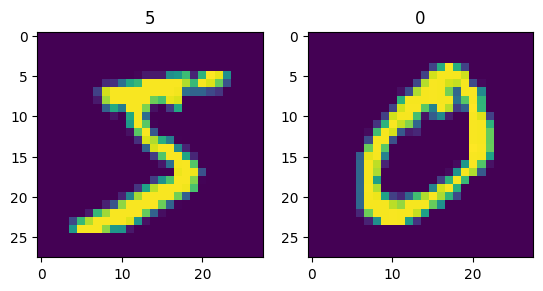

In [8]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [9]:
# 2)      Создаем модель для циферок

model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ) , # Линейный слой, преобразующий вектор 728 в вектор размером 128
    nn.ReLU(), # нелинейность
    nn.Linear(
        128, 10 # 10 потому что хотим 10 прогнозов, вероятность цифр от 0 до 9
    ), # линейный слой, преобразуем вектор 128 в вектор размера 10
)  # создаем пустую модель, в которую будем добавлять слои

# Создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [10]:
from IPython.display import clear_output

In [13]:
train_losses = []
val_losses = []
val_accuracies = []
# всего у нас будет 5 эпох
for epoch in range(5):
    epoch_train_loss = []
    for x_train, y_train in tqdm(train_dataloader): #берем батч из трейн лоадера
        y_pred = model(x_train.to(device))
        loss = F.cross_entropy(y_pred, y_train.to(device)) # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad()  # обнуляем посчитанные градиенты параметров
        epoch_train_loss.append(loss.item())

    train_losses.append(np.mean(epoch_train_loss))

    val_loss = []  # сюда будем складывать **средний по батчу** лосс
    val_accuracy = []
    with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
        for x_val, y_val in tqdm(val_dataloader):  # берем батч из валидационного лоадера
            y_pred = model(x_val.to(device))  # делаем предсказания
            loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
            val_loss.append(loss.cpu().numpy())  # добавляем в массив
            val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val.to(device)).cpu().numpy().tolist())

    val_losses.append(np.mean(val_loss))
    val_accuracies.append(np.mean(val_accuracy))

    # печатаем метрики
    print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11245523393154144, accuracy: 0.9658


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 1, loss: 0.12223303318023682, accuracy: 0.9601


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.07349814474582672, accuracy: 0.9757


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 3, loss: 0.0879501923918724, accuracy: 0.974


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08747828006744385, accuracy: 0.9738


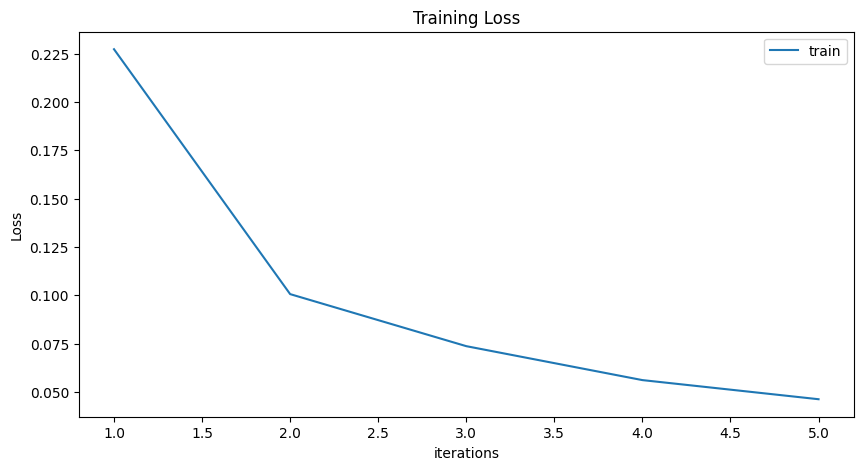

In [14]:
plt.figure(figsize=(10,5))
plt.title("Training Loss")
plt.plot(np.arange(1,len(train_losses)+1), train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [35]:
def train(model, optimizer, n_epochs=5):
    """Функция, в которой проходит обучение нейросети.

    Parameters
    ----------
    model : nn.Module
        Нейросеть для обучения.
    optimizer : torch.optim.Optimizer
        Алгоритм оптимизации гиперпараметров (например, SGD)
    n_epochs : int, default 5
        Количество эпох для обучения нейросети. Эпоха – проход по объектам
        датасета алгоритмом оптимизации с обновлением гиперпараметров.
    """

    for epoch in range(n_epochs):
        # тренировка
        for x_train, y_train in tqdm(train_dataloader):
            y_pred = model(x_train)
            loss = F.cross_entropy(y_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # валидация
        if epoch % 2 == 0:
            val_loss = []
            val_accuracy = []

            # отключается весь функционал расчета градиентов
            with torch.no_grad():
                for x_val, y_val in tqdm(val_dataloader):
                    y_pred = model(x_val)
                    loss = F.cross_entropy(y_pred, y_val)
                    val_loss.append(loss.numpy())
                    val_accuracy.extend(
                        (torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist()
                    )

            # печатаем метрики
            print(
                f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
            )

In [38]:
model = nn.Sequential(
    nn.Conv2d(
        in_channels=1, out_channels=10, kernel_size=5
    ),  # добавим свёрточный слой с 10 ядрами
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=4),  # уменьшим картинку в 4 раза по каждой стороне
    nn.Flatten(),  # превращаем картинку 6х6х10 в вектор размером 360
    nn.Linear(
        6 * 6 * 10, 128
    ),  # линейный слой, преобразующий вектор размера 360 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # отображение в пространство размерности числа меток классификации
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [39]:
print(
    f"Training model with {sum([x[1].numel() for x in model.named_parameters()])} parameters"
)
train(model, optimizer)

Training model with 47758 parameters


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.09289025515317917, accuracy: 0.9707


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.05246445909142494, accuracy: 0.9833


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.04037349298596382, accuracy: 0.9863


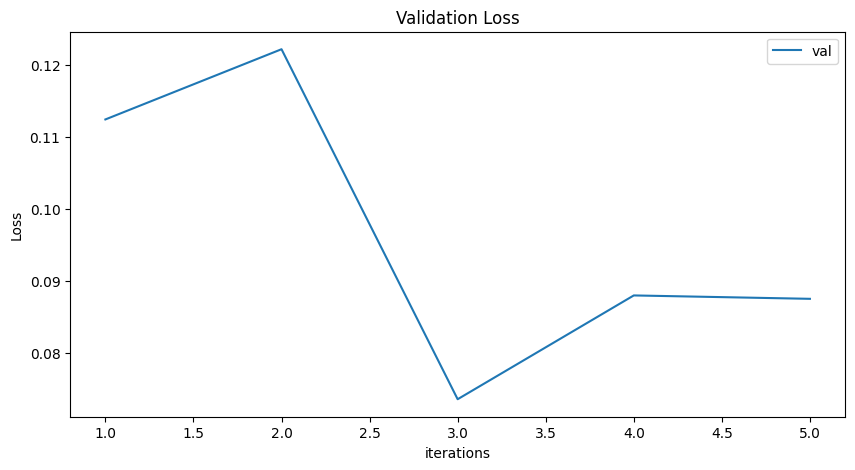

In [21]:
plt.figure(figsize=(10,5))
plt.title("Validation Loss")
plt.plot(np.arange(1,len(val_losses)+1), val_losses,label="val")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
class ConvNetMNIST(nn.Module):

    def __init__(self):
        """Создание объекта класса. Через дополнительные аргументы можно
        изменять параметры слоев сети."""
        # инициализируем родителя
        super().__init__()

        # записываем в атрибуты составные части сети
        self.conv_1 = nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5)
        self.conv_2 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5)
        self.relu = nn.ReLU()  # используется 3 раза
        self.pool = nn.MaxPool2d(kernel_size=2)  # используется 2 раза
        self.flatten = nn.Flatten()
        self.fc_1 = nn.Linear(4 * 4 * 20, 128)
        self.fc_2 = nn.Linear(128, 10)

    def forward(self, x : torch.tensor) -> torch.tensor:
        """Прямой проход по нейронной сети. Вычисление предсказаний."""
        pred = self.conv_1(x)
        pred = self.relu(pred)
        pred = self.pool(pred)
        pred = self.conv_2(pred)
        pred = self.relu(pred)
        pred = self.pool(pred)
        pred = self.flatten(pred)
        pred = self.fc_1(pred)
        pred = self.relu(pred)
        pred = self.fc_2(pred)

        return pred

model = ConvNetMNIST()

In [41]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(
    f"Training model with {sum([x[1].numel() for x in model.named_parameters()])} parameters"
)

train(model, optimizer)

Training model with 47658 parameters


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.05939848721027374, accuracy: 0.9803


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.03384195640683174, accuracy: 0.9891


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.029447365552186966, accuracy: 0.9912


Домашнее задание

In [42]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

In [43]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 32 * 32 * 3
hidden_size = 500
num_classes = 20
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [44]:
# CIFAR dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

100%|██████████| 170M/170M [00:06<00:00, 24.4MB/s]


In [59]:
print(f'Количество пикселей в одном изображении: {num_pixels_per_image}')

NameError: name 'num_pixels_per_image' is not defined

In [58]:
train_dataset.size()

AttributeError: 'CIFAR10' object has no attribute 'size'

In [48]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [55]:
for i in train_dataset:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

TypeError: can only concatenate tuple (not "int") to tuple

In [49]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        pred = self.fc1(x)
        pred = self.relu(pred)
        pred = self.pool(pred)
        pred = self.fc2(pred)

        # your code here
        return pred

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [50]:
# Loss and optimizer
# criterion = ...
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [51]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = ...
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            # your code here

TypeError: linear(): argument 'input' (position 1) must be Tensor, not ellipsis